In this project, we are planning to launch a new credit card product targeted at users across various age groups. The eligibility and segmentation of users will be primarily determined based on their credit score status. Additionally, we will incorporate an assessment of each user's payment history to ensure responsible credit behavior and minimize risk. This approach will help us tailor the credit card offerings to better match the financial profile and needs of different user segments.

#Read data from mysql DB using mysql-connector-python or PyMySQL library. Here we're using mysql-connector.

In [1]:
#import required libraries
import mysql.connector  # To establish connection with MySQL database
import pandas as pd     # For data manipulation and executing SQL queries
import seaborn as sns   # For statistical data visualization (plots, heatmaps, etc.)
from matplotlib import pyplot as plt  # For plotting and customizing visualizations
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Establish the connection
conn = mysql.connector.connect(
    host="localhost",    
    user="root",
    password="root",
    database="e_master_card"
)
#read customers data
df_customers = pd.read_sql('select * from customers',conn)
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [3]:
#read customer transactions data
df_transactions = pd.read_sql('select * from transactions',conn)
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [4]:
#read customer credit_profiles data
df_credit_profiles = pd.read_sql('select * from credit_profiles',conn)
df_credit_profiles.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [5]:
#Analyze the customers data using describe
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [6]:
#Check the null values if we have any across all columns in data frame
print(df_customers.isnull().sum())
#Empty are replace with 0's. Hence, executed below statement
count = (df_customers.annual_income == 0).sum()
print('Annual Income has zeros around ',count,' rows.')

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64
Annual Income has zeros around  50  rows.


In [7]:
# want to print all the records where Annual Income is '0'.
df_customers[(df_customers.annual_income==0)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,0,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,0,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,0,Married
170,171,Advait Verma,Male,52,City,Business Owner,0,Single
186,187,Samar Sardar,Male,53,City,Consultant,0,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,0,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,0,Married
232,233,Aditya Goel,Male,26,City,Freelancer,0,Married


In [8]:
#Identify the shape
df_customers[(df_customers.annual_income==0)].shape

(50, 8)

We can replace 50 records annaul income in 3 ways
1) Mean - Data is symmetrical and minimal outliers
2) Median - Data is skewed and more outliers
3) complete delete the records - Data is very less number

Here we use Median based on occupation as annual income might be different.

In [9]:
Occupation_wise_medaian = df_customers.groupby('occupation')['annual_income'].median()
Occupation_wise_medaian 

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [10]:
# Define function or lambda to replace null annual income based on occupation
def get_median_val(row):
    if pd.isnull(row["annual_income"]):
        return Occupation_wise_medaian[row["occupation"]]
    else:
        return row['annual_income']

In [10]:
df_customers['annual_income']=df_customers.apply(
    lambda row: Occupation_wise_medaian[row["occupation"]] if row["annual_income"]==0 else row['annual_income']
,axis=1)

In [11]:
df_customers[(df_customers.annual_income==0)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [12]:
#validate data based on index
df_customers.iloc[[14,82,97]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,44915.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,45189.5,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,254881.0,Married


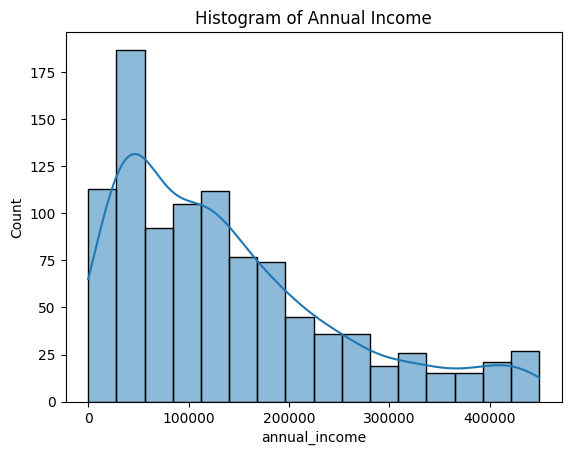

In [13]:
#Histogram plot on annual income
plt.Figure(figsize=(12,12))
sns.histplot(df_customers['annual_income'],kde=True,label='Data')
plt.title('Histogram of Annual Income')
plt.show()

Now, we're trying to identify the outliers as per business we want to eliminate records with annual income less than 100. Intead of elimination we override the annual income with occupation wise median

In [14]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138634.437500
std,288.819436,15.666155,110961.396638
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [15]:
df_customers[df_customers['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [16]:
# Loop through the dataset and replace 'annual_income' values less than 100 
# with the median income for that specific occupation
for index, row in df_customers.iterrows():
    if row['annual_income']<100:
        df_customers.at[index,'annual_income']=Occupation_wise_medaian[row['occupation']]

In [17]:
df_customers[df_customers['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [18]:
#Occupation wise avg income
avg_income_per_occupation = df_customers.groupby('occupation')['annual_income'].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45239.842105
Business Owner         268119.833910
Consultant              59927.257732
Data Scientist         136208.603261
Freelancer              76293.089912
Fullstack Developer     78618.385135
Name: annual_income, dtype: float64

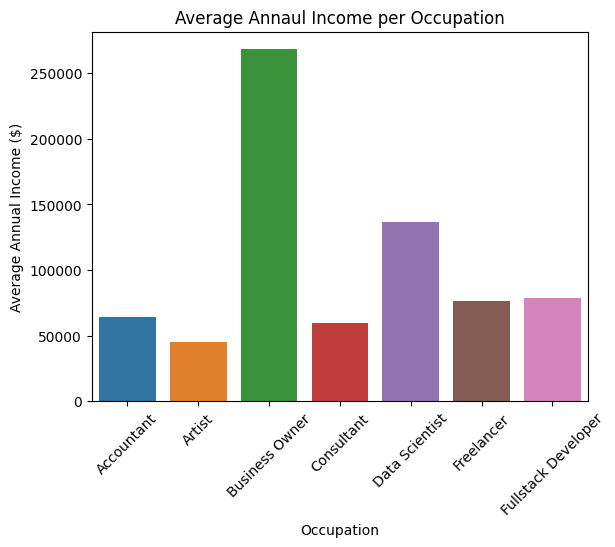

In [19]:
sns.barplot(avg_income_per_occupation,palette='tab10')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income ($)')
plt.title('Average Annaul Income per Occupation')
plt.show()

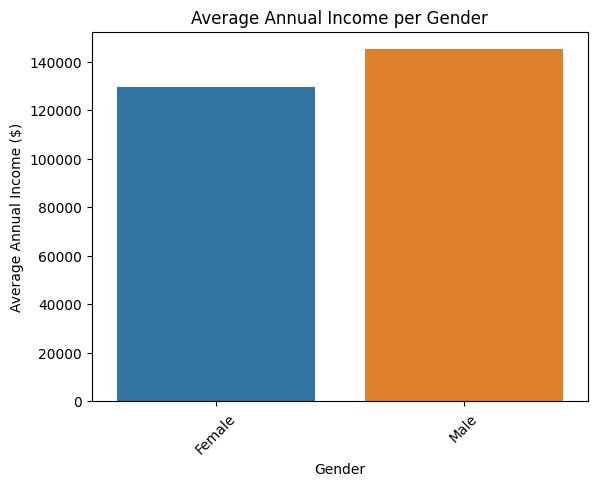

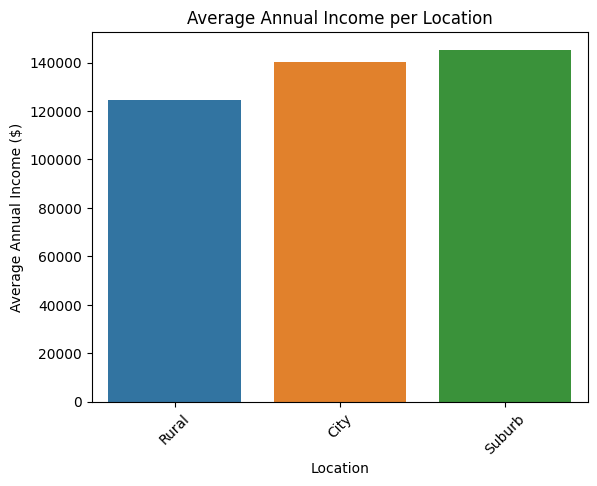

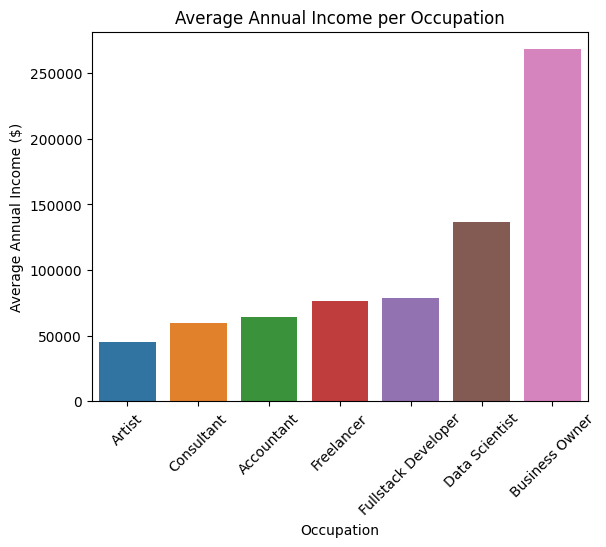

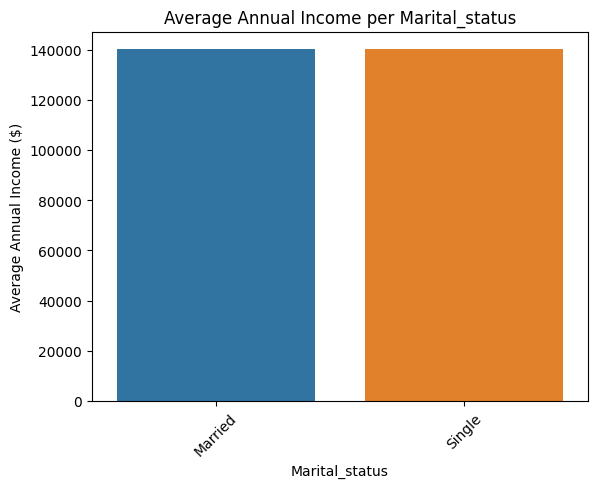

In [20]:
#Calculate Average Annual Income based on gender,location,occupation,marital_status
Categorical_columns = ['gender','location','occupation','marital_status']
for col in Categorical_columns:
    avg_income_per_group = df_customers.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(avg_income_per_group,palette='tab10')
    plt.xticks(rotation=45)
    plt.title(f'Average Annual Income per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Annual Income ($)')
    plt.show()

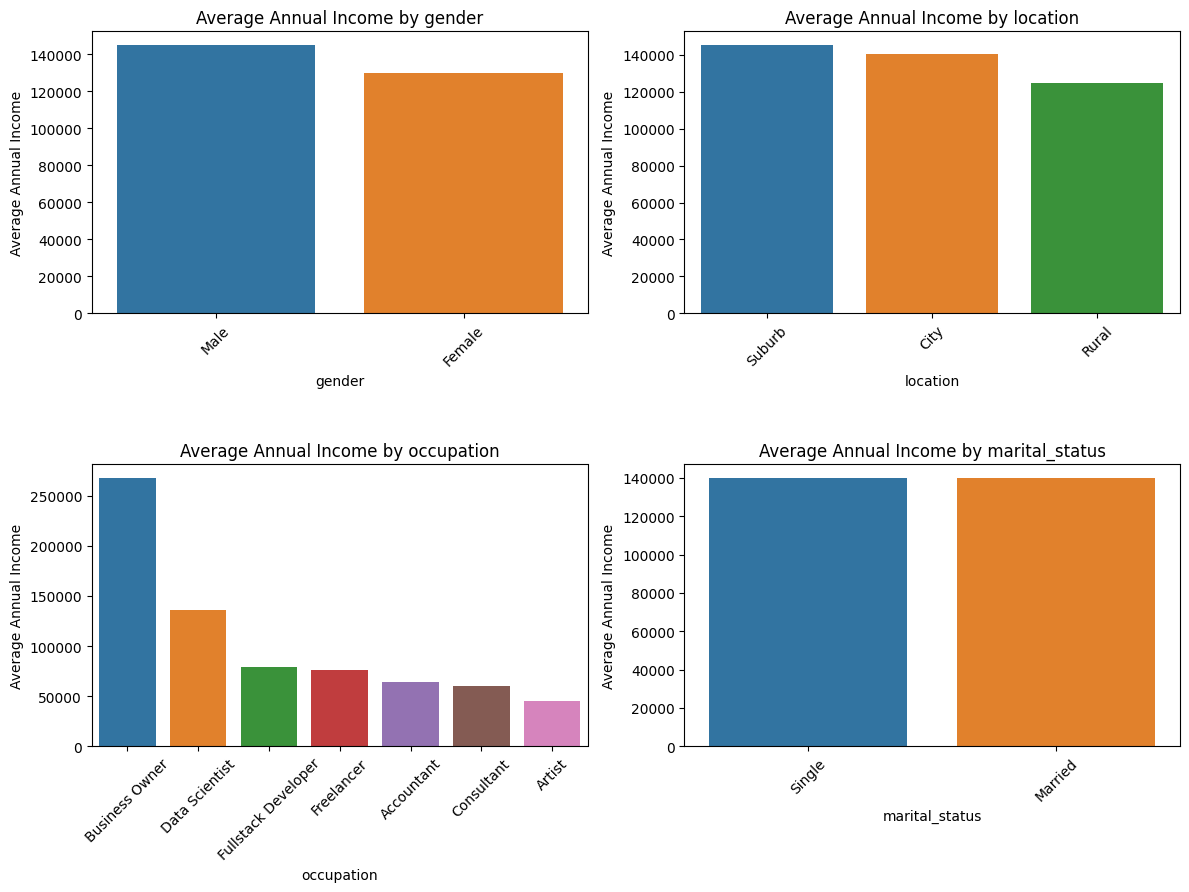

In [21]:
#Display charts in grid format instead of one after the other
#List categorical columns
Categorical_columns = ['gender','location','occupation','marital_status']

num_rows=3
#create subplots
fig, axes = plt.subplots(num_rows,2,figsize=(12,4*num_rows))

#flatten the axes array to make it easier to iterate
axes = axes.flatten()

#create subplots for each categorical column
for i,cat_col in enumerate(Categorical_columns):
    #calculate average annual income for each category
    avg_annual_income_by_category = df_customers.groupby(cat_col)['annual_income'].mean().reset_index()
    # sort the data by annual income before plotting
    sorted_data = avg_annual_income_by_category.sort_values(by='annual_income',ascending=False)

    sns.barplot(x=cat_col,y='annual_income',data=sorted_data,ci=None,ax=axes[i],palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    #Rotate x-axis labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=45)

#Hide any unsed subplots
for i in range(len(Categorical_columns),len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In our customers dataframe, the age column has some outliers. Detect and treat them using an approach that you feel is the best based on your learning in this course. Your business manager has told you that age is valid only if it is between 15 and 80 years.

In [22]:
df_customers.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [23]:
df_customers[(df_customers.age<15) | (df_customers.age>80)].shape

(20, 8)

In [24]:
df_customers[(df_customers.age<15) | (df_customers.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [25]:
avg_age_per_occupation = round(df_customers.groupby('occupation')['age'].median(),0)
avg_age_per_occupation

occupation
Accountant             32.0
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    28.0
Name: age, dtype: float64

In [26]:
for index, row in df_customers.iterrows():
    if (row['age']<15 or row['age']>80):
        df_customers.at[index,'age']=avg_age_per_occupation[row['occupation']]

In [27]:
df_customers[(df_customers.age<15) | (df_customers.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [28]:
df_customers.iloc[[0,41,165]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,26,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,24,City,Freelancer,39721.0,Single


In [ ]:
avgerage_age_per_occupation = df_customers.groupby('occupation')['age'].mean()
avgerage_age_per_occupation

occupation
Accountant             31.875000
Artist                 26.026316
Business Owner         49.501730
Consultant             45.484536
Data Scientist         32.173913
Freelancer             23.877193
Fullstack Developer    26.777027
Name: age, dtype: float64

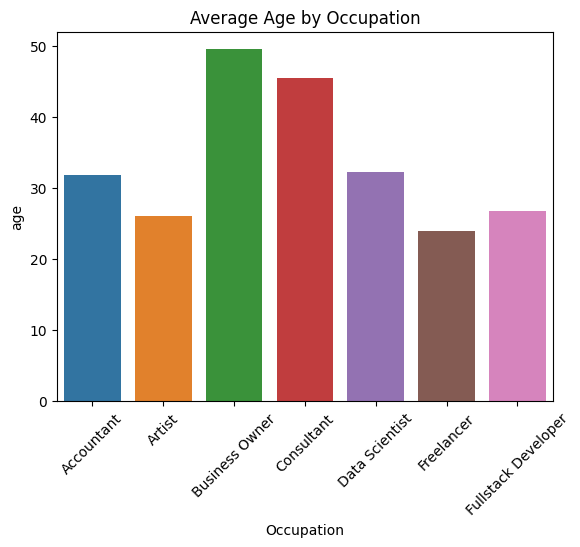

In [37]:
sns.barplot(x=avgerage_age_per_occupation.index, y=avgerage_age_per_occupation.values,palette='tab10')
plt.title('Average Age by Occupation')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('age')
plt.show()

In [38]:
df_customers.age.describe()

count    1000.000000
mean       35.544000
std        12.275372
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

Business asked to create bar chart to identify the percentage of age group between 18-25,26-48 and 49-65

In [40]:
# Define the bin edges and labels
bin_edges = [17,25,48,65]
bin_labels = ['18-25','26-48','49-65']

#use the cut function to bin and label the age column
df_customers['age_group'] = pd.cut(df_customers['age'],bins=bin_edges,labels=bin_labels)
df_customers.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [43]:
age_group_counts = df_customers.age_group.value_counts(normalize=True)*100
age_group_counts

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

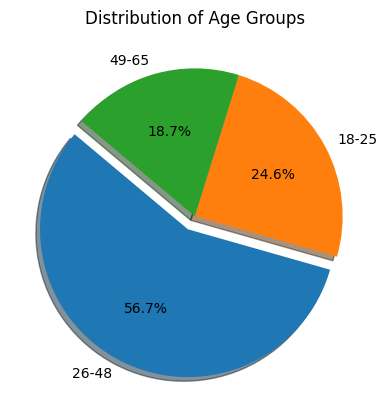

In [48]:
#Plot pie chart
plt.pie(age_group_counts,labels=age_group_counts.index
        ,autopct='%1.1f%%'
        ,shadow=True
        ,explode=(0.1,0,0)
        ,startangle=140)
plt.title('Distribution of Age Groups')
plt.show()

In [49]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [ ]:
#Get count of values based on location
df_customers.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [51]:
#Get count of values based on gender
df_customers.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [52]:
#Get the location values based on gender
df_customers.groupby(['location','gender']).size()

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [53]:
# Use Unstack() to convert multi-index rows into dataframe
customer_location_gender =  df_customers.groupby(['location','gender']).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


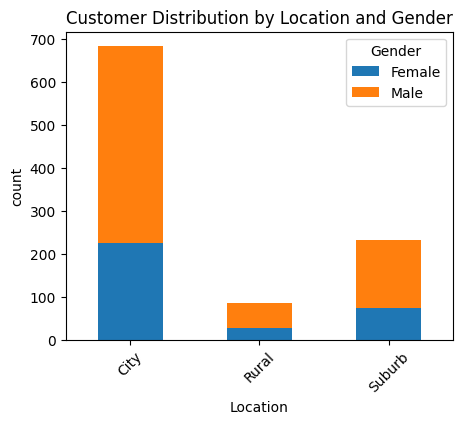

In [57]:
customer_location_gender.plot(kind='bar',stacked=True,figsize=(5,4))
plt.title('Customer Distribution by Location and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.xlabel('Location')
plt.ylabel('count')
plt.show()